<a href="https://colab.research.google.com/github/Andron00e/Waves.Simulations/blob/main/2DacousticVersion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computers Waves Simulations

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Определяем параметры

In [13]:
x_n_points = 200                        
y_n_points = 200                        
dx = 10.0                               
t_n_points = 1000                       
dt = 0.001                              

source_x = x_n_points//2                 
source_y = y_n_points//2                 
source_t = 100                          
receiver_x = np.array([60, 80, 100, 120, 140])      
receiver_y = np.array([5, 5, 5, 5, 5])              

f_0 = 40.0                              
T_period = 1/float(f_0)                 
f_snap = 10                             
op_n_points = 5                         
seis = np.zeros((len(receiver_x), t_n_points))

p = np.zeros((y_n_points, x_n_points))              
p_old = np.zeros((y_n_points, x_n_points))          
p_new = np.zeros((y_n_points, x_n_points))          
d2p_x = np.zeros((y_n_points, x_n_points))          
d2p_y = np.zeros((y_n_points, x_n_points))          

c_0 = 3000.0                                        
c = np.zeros((y_n_points, x_n_points))              # Defining the velocity model
c += c_0
c[:, x_n_points//2 - 5: x_n_points//2 + 5] *= 0.8
c_max = c.max()

source_fnc = np.zeros(t_n_points + 1)
for it in range(t_n_points):
    source_fnc[it] = np.exp(-1.0 / float(T_period ** 2) * ((it - source_t) * dt) ** 2)

source_fnc = np.diff(source_fnc) / float(dt)                      
source_fnc[t_n_points - 1] = 0                                    # Assigning the boundary value as 0

График волновой функции

CFL criterion epsilon = c*dt/dx : 0.3


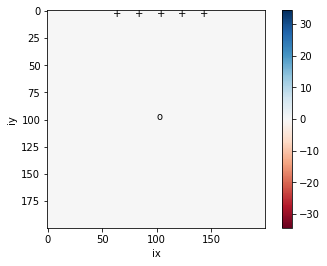

In [14]:
v = max([np.abs(source_fnc.min()), np.abs(source_fnc.max())])

image = plt.imshow(p_new, interpolation='nearest', animated=True, vmin=-v, vmax=+v, cmap=plt.cm.RdBu)

# Plot the receivers
for x, y in zip(receiver_x, receiver_y):
    plt.text(x, y, '+')

plt.text(source_x, y_n_points//2, 'o')                                # source_y = y_n_points//2
plt.colorbar()
plt.xlabel('ix')
plt.ylabel('iy')

plt.ion()
ir = np.arange(len(receiver_x))

print("CFL criterion epsilon = c*dt/dx :", c_max*dt/dx)               # CFL Criteria
plt.show()

Численное решение

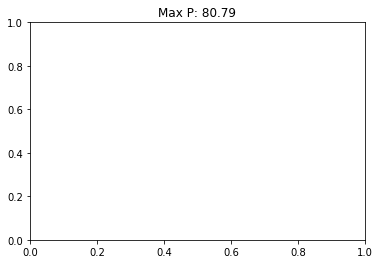

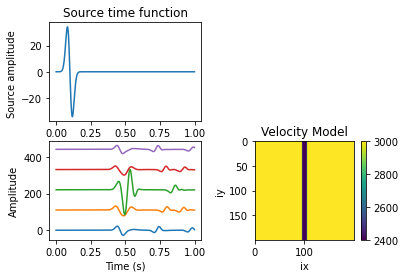

In [15]:
for it in range(t_n_points):
    for i in range(1, x_n_points - 1):
        d2p_y[:, i] = (p[:, i + 1] - 2 * p[:, i] + p[:, i - 1])/float(dx ** 2)      
    for j in range(1, y_n_points - 1):
        d2p_x[j, :] = (p[j - 1, :] - 2 * p[j, :] + p[j + 1, :])/float(dx ** 2)      

    p_new = 2 * p - p_old + dt ** 2 * c ** 2 * (d2p_x + d2p_y)       
    p_new[source_y, source_x] = p_new[source_y, source_x] + source_fnc[it]

    if it % f_snap == 0:  

        plt.title("Max P: %.2f" % p.max())
        image.set_data(p_new)
        plt.gcf().canvas.draw()

    p_old, p = p, p_new

    
    seis[ir, it] = p[receiver_y[ir], receiver_x[ir]]




plt.ioff()
plt.figure()

plt.subplot(221)
time = np.arange(t_n_points) * dt
plt.plot(time, source_fnc)
plt.title('Source time function')
plt.xlabel('Time (s) ')
plt.ylabel('Source amplitude ')

plt.subplot(223)
ymax = seis.ravel().max()
for ir in range(len(seis)):
    plt.plot(time, seis[ir, :] + ymax * ir)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

plt.subplot(224)
plt.title('Velocity Model')
plt.imshow(c)
plt.xlabel('ix')
plt.ylabel('iy')
plt.colorbar()

plt.show()  